In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
# Load the uploaded housing dataset
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Define binary categorical columns
binary_columns = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea'
]

# Function to map 'yes'/'no' to 1/0
def map_yes_no(column):
    return column.map({'yes': 1, 'no': 0})

# Apply the mapping to each column in the list
df[binary_columns] = df[binary_columns].apply(map_yes_no)

# Display the updated DataFrame
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [60]:
# Add intercept (bias) term to input matrix
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

# Compute the mean squared error cost
def compute_cost(X, y, theta):
    m = X.shape[0]
    predictions = X.dot(theta)
    errors = predictions - y
    squared_errors = np.square(errors)
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

# Compute cost with L2 regularization
def compute_cost_regularized(X, y, theta, lamda):
    m = X.shape[0]
    predictions = X.dot(theta)
    errors = predictions - y
    squared_errors = np.sum(np.square(errors))
    reg_term = lamda * np.sum(np.square(theta))
    cost = (1 / (2 * m)) * (squared_errors + reg_term)
    return cost

# Gradient Descent with optional L2 regularization
def gradient_descent(X_train, y_train, X_test, y_test, n_epochs, lr=0.01, lamda=0):
    m = len(y_train)
    thetas = np.zeros((X_train.shape[1], 1))
    train_cost_history = []
    test_cost_history = []

    for epoch in range(n_epochs):
        # Compute predictions
        predictions = X_train @ thetas
        errors = predictions - y_train

        # Gradient with L2 regularization (excluding bias term from penalty)
        gradients = (X_train.T @ errors + lamda * np.vstack(([0], thetas[1:]))) / m
        thetas -= lr * gradients

        # Compute cost
        train_loss = np.mean((X_train @ thetas - y_train) ** 2) / 2
        test_loss = np.mean((X_test @ thetas - y_test) ** 2) / 2
        train_cost_history.append(train_loss)
        test_cost_history.append(test_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Train Loss {train_loss}")
            print(f"Epoch {epoch}, Test Loss {test_loss}")

    return thetas, train_cost_history, test_cost_history

Problem 1.a

In [61]:
# Define features and target column
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = df[num_vars]
target_column = 'price'

In [62]:
# Separate inputs and target
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

Input shape: (545, 5)
Target shape: (545, 1)


In [63]:
# Add intercept term (bias)
inputs = add_intercept(inputs)
print(inputs.shape)

(545, 6)


In [64]:
# Initialize theta values
thetas = np.zeros((inputs.shape[1], 1))
print(thetas)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [65]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=42)

In [126]:
# Set number of epochs and run gradient descent
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.1
)

Epoch 0, Train Loss 10800895750834.354
Epoch 0, Test Loss 11618231204536.465
Epoch 10, Train Loss 2843396084726.8457
Epoch 10, Test Loss 3143710097224.4077
Epoch 20, Train Loss 1875949310198.4995
Epoch 20, Test Loss 1995988988923.2402
Epoch 30, Train Loss 1758330261969.551
Epoch 30, Test Loss 1815512139905.7876
Epoch 40, Train Loss 1744030484079.356
Epoch 40, Test Loss 1779295191697.0857


In [127]:
# Show final theta values
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.20083064e+02]
 [4.70505573e+06]
 [2.30828293e+03]
 [1.22147657e+03]
 [1.71654236e+03]
 [7.07345786e+02]
 [2.60899737e+02]
 [3.70110425e+02]
 [7.81776667e+01]
 [5.21782111e+02]
 [9.20536376e+02]
 [3.49766414e+02]]


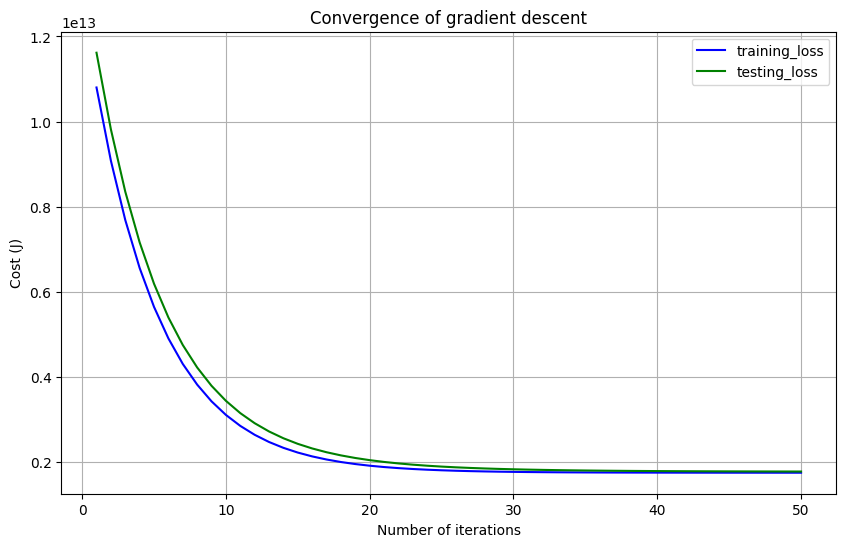

In [128]:
# Plot training and testing cost
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='training_loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='testing_loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

Problem 1.b

In [69]:
# Select additional features including binary categorical variables
num_vars = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'price'
]

data = df[num_vars]
target_column = 'price'

In [70]:
# Split input features and target output
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

Input shape: (545, 11)
Target shape: (545, 1)


In [71]:
# Add intercept term
inputs = add_intercept(inputs)
print(inputs.shape)

(545, 12)


In [72]:
# Initialize theta values
thetas = np.zeros((inputs.shape[1], 1))
print(thetas)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [73]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=0)

In [129]:
# Set training configuration and run gradient descent
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, lr=0.1, n_epochs=n_epochs
)

Epoch 0, Train Loss 10800895750834.354
Epoch 0, Test Loss 11618231204536.465
Epoch 10, Train Loss 2843396084726.8457
Epoch 10, Test Loss 3143710097224.4077
Epoch 20, Train Loss 1875949310198.4995
Epoch 20, Test Loss 1995988988923.2402
Epoch 30, Train Loss 1758330261969.551
Epoch 30, Test Loss 1815512139905.7876
Epoch 40, Train Loss 1744030484079.356
Epoch 40, Test Loss 1779295191697.0857


In [130]:
# Print final learned parameters
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.20083064e+02]
 [4.70505573e+06]
 [2.30828293e+03]
 [1.22147657e+03]
 [1.71654236e+03]
 [7.07345786e+02]
 [2.60899737e+02]
 [3.70110425e+02]
 [7.81776667e+01]
 [5.21782111e+02]
 [9.20536376e+02]
 [3.49766414e+02]]


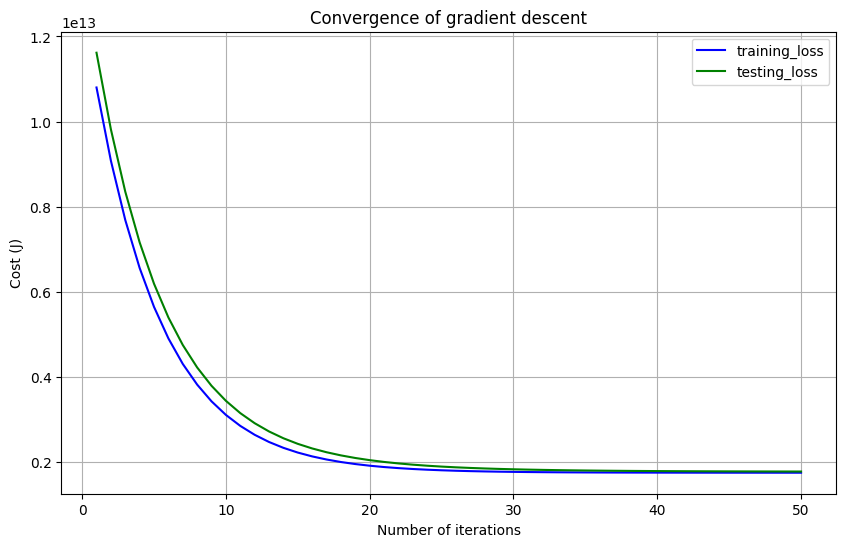

In [131]:
# Plot cost vs. iterations
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='training_loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='testing_loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

Problem 2.a

*   Using Normalization as Pre-processing



In [77]:
# Select numerical and binary features used in Problem 1.b
num_vars = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'price'
]

data = df[num_vars]
target_column = 'price'

In [78]:
# Separate input features and target values
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

Input shape: (545, 11)
Target shape: (545, 1)


In [79]:
# Add intercept term
inputs = add_intercept(inputs)
print(inputs.shape)

# Initialize theta
thetas = np.zeros((inputs.shape[1], 1))
print(thetas)

(545, 12)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [80]:
# Normalize input features
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(inputs)
inputs = norm.transform(inputs)

In [81]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [82]:
# Train using gradient descent
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, lr=0.1, n_epochs=n_epochs
)

Epoch 0, Train Loss 10800895750834.354
Epoch 0, Test Loss 11618231204536.465
Epoch 10, Train Loss 2843396084726.8457
Epoch 10, Test Loss 3143710097224.4077
Epoch 20, Train Loss 1875949310198.4995
Epoch 20, Test Loss 1995988988923.2402
Epoch 30, Train Loss 1758330261969.551
Epoch 30, Test Loss 1815512139905.7876
Epoch 40, Train Loss 1744030484079.356
Epoch 40, Test Loss 1779295191697.0857


In [83]:
# Output final theta values
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.20083064e+02]
 [4.70505573e+06]
 [2.30828293e+03]
 [1.22147657e+03]
 [1.71654236e+03]
 [7.07345786e+02]
 [2.60899737e+02]
 [3.70110425e+02]
 [7.81776667e+01]
 [5.21782111e+02]
 [9.20536376e+02]
 [3.49766414e+02]]


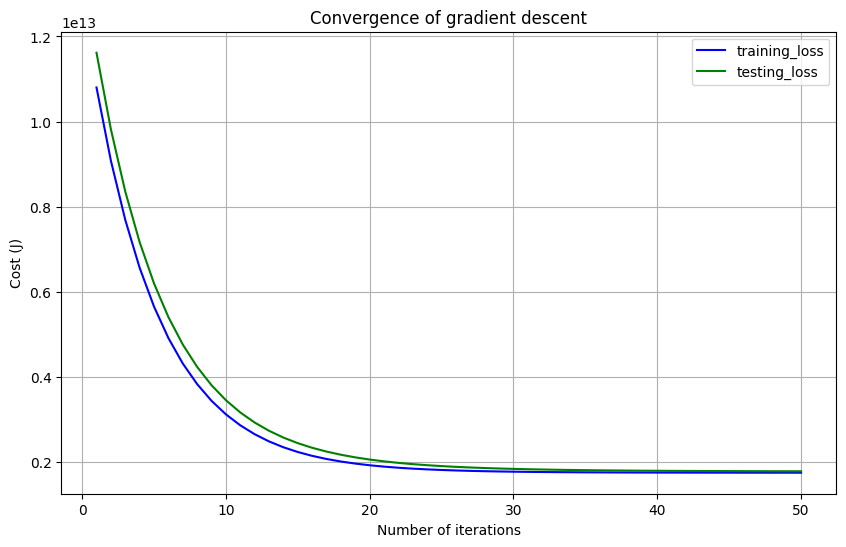

In [110]:
# Plot training and test cost over iterations
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='training_loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='testing_loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

Problem 2.b

*   Using standardization as Pre-processing




In [85]:
# Define the full feature set including binary columns
num_vars = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'price'
]

data = df[num_vars]
target_column = 'price'

In [86]:
# Split features and target
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

Input shape: (545, 11)
Target shape: (545, 1)


In [87]:
# Add intercept term
inputs = add_intercept(inputs)
print(inputs.shape)

# Initialize theta
thetas = np.zeros((inputs.shape[1], 1))
print(thetas)

(545, 12)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [88]:
# Apply standardization (mean=0, std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs = scaler.transform(inputs)

In [89]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [90]:
# Train model with gradient descent
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, lr=0.1, n_epochs=n_epochs
)

Epoch 0, Train Loss 12526202542348.936
Epoch 0, Test Loss 13249635417152.984
Epoch 10, Train Loss 11911507258807.959
Epoch 10, Test Loss 12192718667185.066
Epoch 20, Train Loss 11893107794992.816
Epoch 20, Test Loss 12215974079543.799
Epoch 30, Train Loss 11889144991454.182
Epoch 30, Test Loss 12247746546361.62
Epoch 40, Train Loss 11888068502928.648
Epoch 40, Test Loss 12265082730115.803


In [91]:
# Show final learned parameters
print("Final Theta values:")
print(thetas)

Final Theta values:
[[     0.        ]
 [472141.06587539]
 [ 54446.62132404]
 [596678.09303336]
 [246438.39998024]
 [257487.12969862]
 [-26828.90301072]
 [204833.99370448]
 [246200.69875284]
 [363740.58684392]
 [218536.74136699]
 [297829.68051459]]


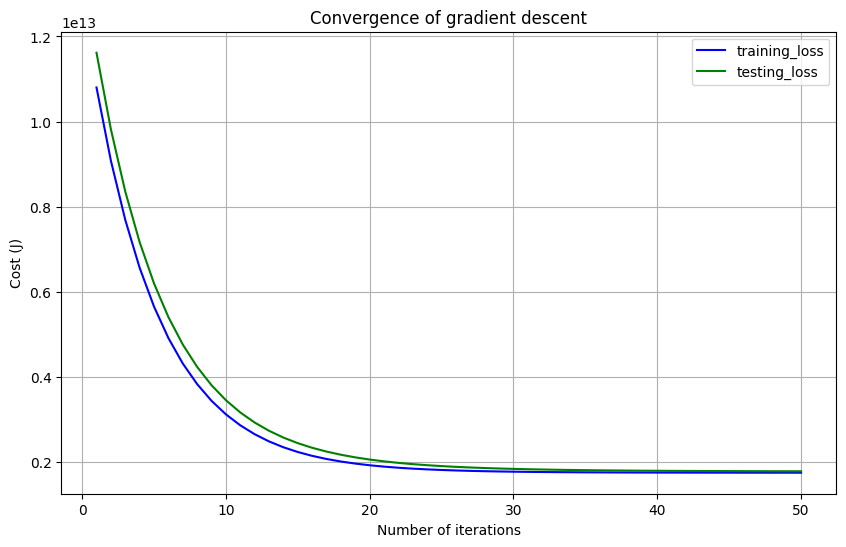

In [111]:
# Plot convergence of training and test cost
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='training_loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='testing_loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

Problem 3.a

*   Using normalization as pre processing



In [93]:
# Define features for Problem 3.a (same as 1.a with regularization added)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = df[num_vars]
target_column = 'price'

In [94]:
# Split features and target
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

Input shape: (545, 5)
Target shape: (545, 1)


In [95]:
# Add intercept term
inputs = add_intercept(inputs)
print(inputs.shape)

# Initialize theta
thetas = np.zeros((inputs.shape[1], 1))
print(thetas)

(545, 6)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [96]:
# Apply normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(inputs)
inputs = norm.transform(inputs)

In [97]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [104]:
# Run gradient descent with L2 regularization (lambda = 5)
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, lr=0.1, n_epochs=n_epochs, lamda=5
)

Epoch 0, Train Loss 10800895750834.354
Epoch 0, Test Loss 11618231204536.465
Epoch 10, Train Loss 2867808669959.2983
Epoch 10, Test Loss 3171173471063.631
Epoch 20, Train Loss 1894252851551.9304
Epoch 20, Test Loss 2020677534008.6675
Epoch 30, Train Loss 1767386400274.02
Epoch 30, Test Loss 1832897485902.2234
Epoch 40, Train Loss 1748396931094.0083
Epoch 40, Test Loss 1792937835067.5164


In [99]:
# Print final theta values
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.57476513e+02]
 [4.65319871e+06]
 [2.29631486e+03]
 [1.20997497e+03]
 [1.70019992e+03]
 [9.05374150e+02]]


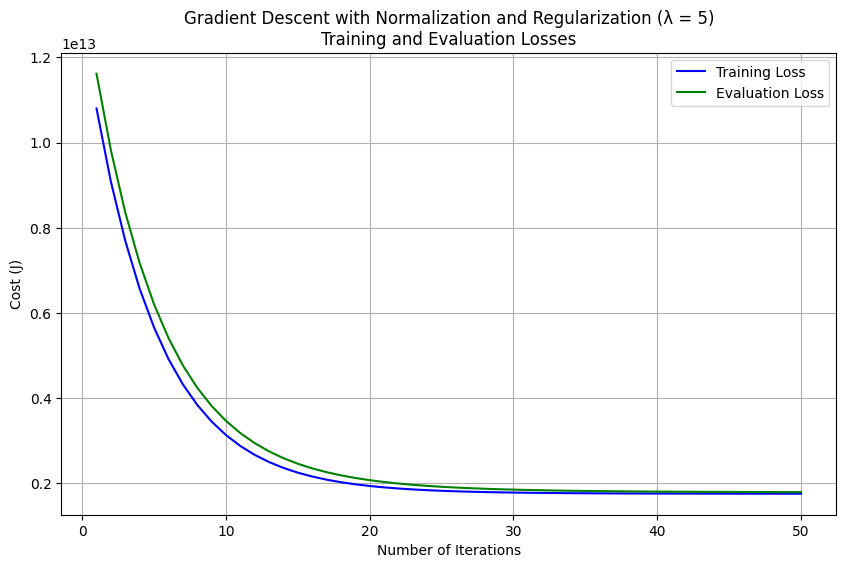

In [100]:
# Plot training and evaluation (test) losses
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='Training Loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='Evaluation Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent with Normalization and Regularization (λ = 5)\nTraining and Evaluation Losses')
plt.legend()
plt.show()

Problem 3.b

*   Using normalization as pre processing


In [101]:
# Setup for Problem 3.b
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'prefarea', 'price']

data = df[num_vars]
target_column = 'price'  # Target to predict

inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

def get_modified_inputs(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))


print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

inputs = get_modified_inputs(inputs)
print(inputs.shape)

thetas = np.zeros([inputs.shape[1], 1])
print(thetas)

norm = Normalizer().fit(inputs)
norm.fit(inputs)
inputs = norm.transform(inputs)

Input shape: (545, 11)
Target shape: (545, 1)
(545, 12)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [102]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=9)

In [105]:
# Training the model with regularization
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, lr=0.1, n_epochs=n_epochs, lamda=3
)

Epoch 0, Train Loss 10800895750834.354
Epoch 0, Test Loss 11618231204536.465
Epoch 10, Train Loss 2858031420489.443
Epoch 10, Test Loss 3160178389989.456
Epoch 20, Train Loss 1886818788520.77
Epoch 20, Test Loss 2010699180081.2124
Epoch 30, Train Loss 1763543283914.375
Epoch 30, Test Loss 1825739516692.8008
Epoch 40, Train Loss 1746364276269.5947
Epoch 40, Test Loss 1787216431866.6113


In [106]:
# Final theta values
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.42591727e+02]
 [4.67381097e+06]
 [2.30111404e+03]
 [1.21455280e+03]
 [1.70670383e+03]
 [7.04348030e+02]
 [2.58105919e+02]
 [3.67713469e+02]
 [7.73743112e+01]
 [5.15810454e+02]
 [9.11385217e+02]
 [3.46056478e+02]]


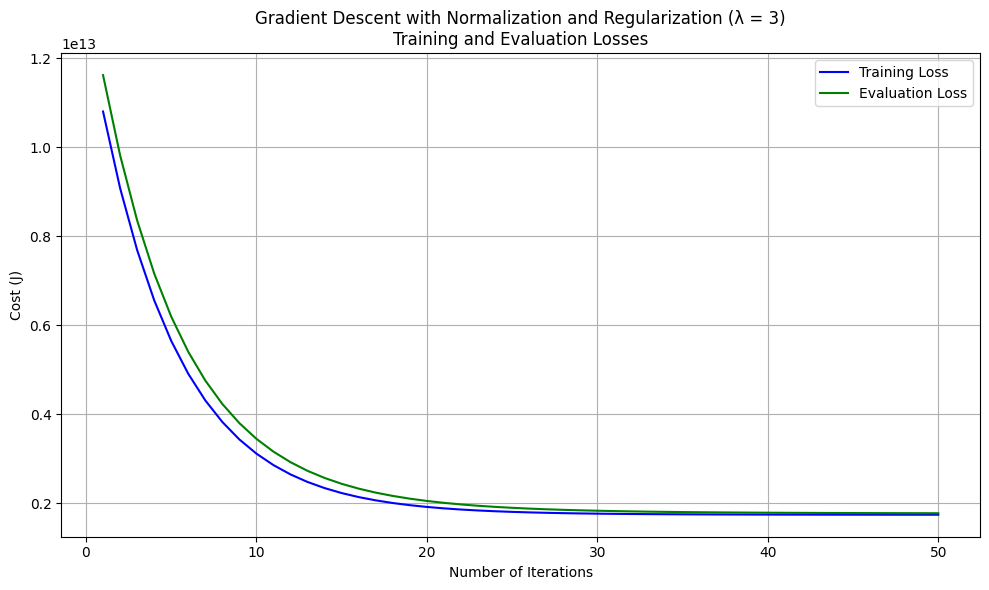

In [107]:
# Plot training and evaluation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='Training Loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='Evaluation Loss')
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Gradient Descent with Normalization and Regularization (λ = 3)\nTraining and Evaluation Losses')
plt.legend()
plt.tight_layout()
plt.show()